# Prediction of bike count demand in bike sharing system

## 1. INTRODUCTION

Bike-sharing start-ups are growing rapidly, these companies provide a fleet of bikes for short-term rental to commuters, tourists, and enthusiasts. While the business is flourishing, it faces the challenge of unpredictable demand fluctuations. On certain days, there are too few bikes available to meet customer demand, leading to dissatisfaction and lost revenue. Conversely, on other days, there is an excess of bikes leading to unnecessary operational costs. The founder of the company is keen to enhance customer satisfaction and optimize operational efficiency by accurately predicting the demand for bikes.

### Authored by: Team DATA CHAMPS

#### Team Members :
- Prudhvi Teja Mamid
- Vinesh Narendra Sangoi
- Suhit Kaluvapalli
- Yashwanth Bharadwaj Nandamuru
- Chaitanya Sai Kunapareddy
- Nikhil Kacham

## 1.1 Problem statement

The primary goal of this data science project is to develop a predictive model that can forecast the number of bikes that will be rented on a given day based on various factors, including weather conditions, the time of year, and the time of day. This predictive model will enable the bike-sharing start-up to make informed decisions about bike allocation and resource management, thereby minimizing under-supply or over-supply situations.

## 1.2 Evaluation metrics

Here we classified bike count to 5 categories based on the demand at a particular hour in a day .
Main operation cost for the system incur during the deployment of cycles in docking stations these cost  varies with the number of cycles deployed to the docking  stations.
If we deploy more cycles than required  number we incur losses as more operation cost than the revenue and it creates, If we deploy less number of cycles it created loss in revenue. So the model should predict the 5 categories of cycle count and it should maximize the profit.

Evaluation:
1. The revenue per cycle per hour is 80 Won
2. AVG cost occur per cycle per hour for balancing the cycle count, deploying to stations and other operation and Maintenance cost is 40 Won
3. Profit per hour per cycle  = renvue generated per cycle per hour - cost incurred due to deploymnet of cycle
4. True positives are the instances where model predict the actual demand, we multiply the demand with difference of revenue and cost (i.e 80-40=40 Won
5. False positives are the instances where model under predict the bike count and we incur losss for not  deploying the require number of bikes = (actual-predict)40, 
6. False_postive_profit= actual_profit_TP- (actual-predict)40.
7. False negatives are the instances where model over predict  bike count and we incur losss for deploying more than required=(predict-actual)40
8. False negative profit = actual profit TP -(actual-predict)40 
9. Here we assumed that the operations const is 50% of toal revenue so we are getting equal values for FP and FN.
10. As were are giving equal importance to both FN and FP we can consider F1 score as the best metrics along with that the model total profit should be maximmum.

## 2.Data loading and pre preocessing

In [261]:
# libraries for calculations
import pandas as pd
import numpy as np

# libraries for models
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# libraries for standandadization of data.
from sklearn.preprocessing import StandardScaler



# libraries for model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

# libraries for balancing data
from imblearn.over_sampling import SMOTE

#libraries for hper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 



import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import seaborn as sns

# random seed value
np.random.seed(42)
random_seed=42

## 2.1 Loading data

In [262]:
df=pd.read_csv('Seoul_data.csv')

In [263]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,12/01/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,12/01/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,12/01/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,12/01/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,12/01/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


> For better understanding of the Data, Here are names of attributes
- Rented Bike count — Count of bikes rented at each hour.
- Date: year-month-day 
- Hour — Hour of the day
- Temperature-Temperature in Celsius
- Humidity — %
- Windspeed — m/s
- Visibility — 10m
- Dew point temperature — Celsius
- Solar radiation — MJ/m2
- Rainfall — mm
- Snowfall — cm
- Seasons — Winter, Spring, Summer, Autumn
- Holiday — Holiday/No holiday
- Functional Day — No Func (Non-Functional Hours), Fun(Functional hours)


In [264]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()]))

Duplicate entry in data: 0


In [265]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",df.shape,"\n") 

Total Rows and Columns in DataFrame is : (8760, 14) 



### 2.2 Describing data

In [266]:
# Statistical info.
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning. The “Wind speed”,”Dew point temperature(°C)”, “Solar Radiation”, “Rainfall” and “Snowfall” column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

In [267]:
# Grouping by functioning day and calculating the total Rented Bike Count
df.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


As per diagnosis data found that rental bike only given on Functioning Day, so removing Non-Functioning Days and then remove Functioning Day Column also

In [268]:
#Removing data of non functional days (non rented days)
df=df.drop(df[df['Functioning Day'] == 'No'].index)

In [269]:
#Due to not unsefull in Functioning Day Column ,remove Functioning Day Column
df=df.drop(['Functioning Day'], axis = 1)

In [270]:
#Checking DataFrame Shape After Removing Non Functional Day Rows And Functional Day Column
print("Filtered Dataframe with only rented bike days :",df.shape,"\n")

Filtered Dataframe with only rented bike days : (8465, 13) 



In [271]:
# Grouping by functioning day and calculating the total Rented Bike Count
df.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


Here we can wee that there is Noticeable bike count on holiday and no holiday

Creating three new columns month and day and year extracting from the date column

In [272]:
 #Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create 'Day' and 'Month' columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year']=df['Date'].dt.year
# drop the Date column after extracting necessory information
df.drop(columns=['Date'],inplace=True)

In [273]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Day', 'Month', 'Year'],
      dtype='object')

In [274]:
df.rename({"temperature(°C)":"Temp","Humidity(%)":"Humidity","Wind speed (m/s)":"Windspeed",
           "Solar Radiation (MJ/m2)":"Solar_Radiation", "Rainfall(mm)":"Rainfall","Snowfall (cm)":"Snowfall",
           "Visibility (10m)":"Visibility","Rented Bike Count":"Rented_bike_count","Dew point temperature(°C)":"dew_point_temerature"},axis=1,inplace=True)

In [275]:
df.columns

Index(['Rented_bike_count', 'Hour', 'Temperature(°C)', 'Humidity', 'Windspeed',
       'Visibility', 'dew_point_temerature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Day', 'Month', 'Year'],
      dtype='object')

<Axes: >

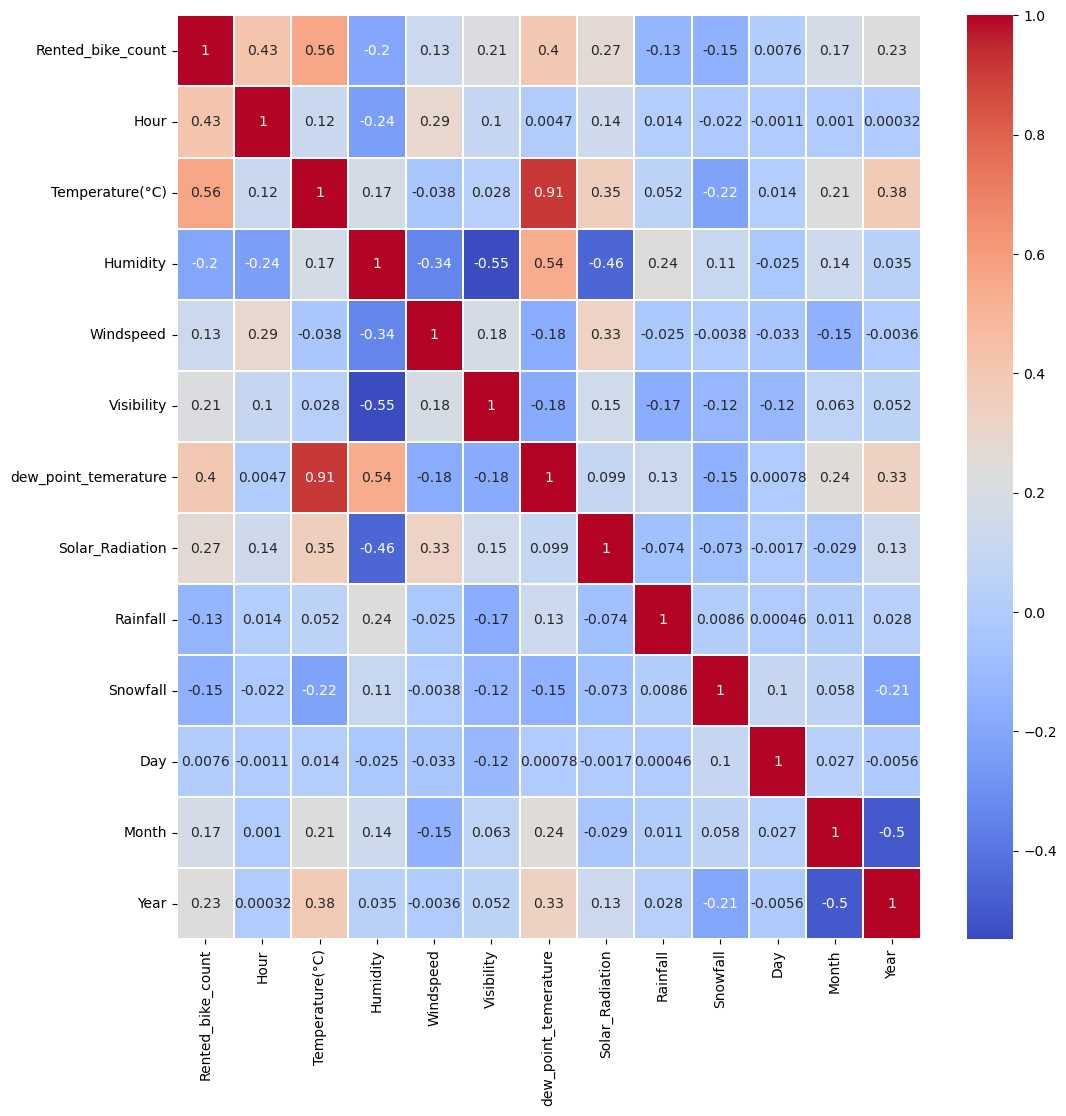

In [276]:
#.corr() use to find correlation with data
data_corr= df.corr()       
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [277]:
df.head()

,Rented_bike_count,Hour,Temperature(°C),Humidity,Windspeed,Visibility,dew_point_temerature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,12,2017


In [278]:
df.shape

(8465, 15)

In [279]:
df.isnull().sum()

Rented_bike_count       0
Hour                    0
Temperature(°C)         0
Humidity                0
Windspeed               0
Visibility              0
dew_point_temerature    0
Solar_Radiation         0
Rainfall                0
Snowfall                0
Seasons                 0
Holiday                 0
Day                     0
Month                   0
Year                    0
dtype: int64

No null vlaues in the data

### 2.4BINS for target 

Creating bins for the target variablem rented bike count, 5 categories
- [-1,250,500,1000,2000,4000] -> ['VERY_LOW_DEMAND','LOW_DEMAND','MODERATE_DEMAND','HIGH_DEMAND','VERY_HIGH_DEMAND']

In [280]:
bins_count = [-1,250,500,1000,2000,4000]

In [281]:
df['Binned_Rented_Bike_Count'] = pd.cut(df['Rented_bike_count'], bins_count,labels=['VERY_LOW_DEMAND','LOW_DEMAND','MODERATE_DEMAND','HIGH_DEMAND','VERY_HIGH_DEMAND'])

<Axes: >

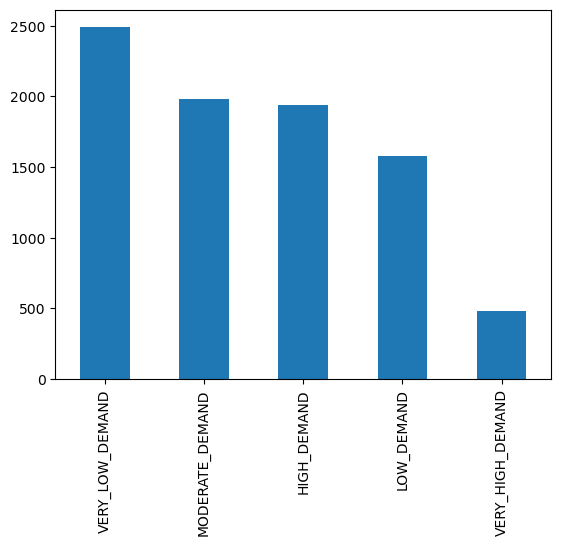

In [282]:
category_counts = df['Binned_Rented_Bike_Count'].value_counts()
category_counts.plot(kind='bar')

Here we can see the imbalances in data, so proper balancing techniques are required.


In [283]:
df['Binned_Rented_Bike_Count'].value_counts()

VERY_LOW_DEMAND     2490
MODERATE_DEMAND     1979
HIGH_DEMAND         1938
LOW_DEMAND          1578
VERY_HIGH_DEMAND     480
Name: Binned_Rented_Bike_Count, dtype: int64

<Figure size 800x600 with 0 Axes>

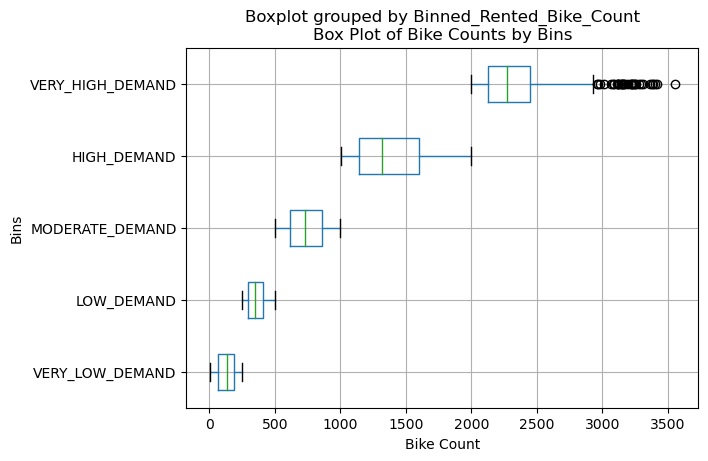

Mean Values for Each Bin:
Binned_Rented_Bike_Count
VERY_LOW_DEMAND      130.0
LOW_DEMAND           355.0
MODERATE_DEMAND      741.0
HIGH_DEMAND         1390.0
VERY_HIGH_DEMAND    2351.0
Name: Rented_bike_count, dtype: float64


In [284]:
mean_values = round(df.groupby('Binned_Rented_Bike_Count')['Rented_bike_count'].mean(),0)

# Create a box plot
plt.figure(figsize=(8, 6))
df.boxplot(column='Rented_bike_count', by='Binned_Rented_Bike_Count', vert=False)
plt.title('Box Plot of Bike Counts by Bins')
plt.xlabel('Bike Count')
plt.ylabel('Bins')
plt.show()

# Print the mean values for each bin
print("Mean Values for Each Bin:")
print(mean_values)

### 2.4 Design of evaluation metrics

In [285]:

Price_per_bike_per_hour=1000,
Cost_per_bike_per_hour=500,
Price=1000
Cost=500
Profit=Price-Cost # profit earned per bike per hour

In [286]:
evaluation_df=pd.DataFrame()
evaluation_df['AVG_bike_count_per_hour']=mean_values

In [287]:
columns_predicted = ['predicted_130', 'predicted_355', 'predicted_741', 'predicted_1390', 'predicted_2351']

# Initialize specified columns with NaN values
for column in columns_predicted:
    evaluation_df[column] = [np.nan] * len(evaluation_df)

In [288]:
evaluation_df.shape

(5, 6)

In [289]:
df1=evaluation_df

In [290]:
for i in range(0,5):
    for j in range(1,6):
        if i+1 == j:
            df1.iat[i, j] = df1.iloc[i, 0] * Profit
        elif j > i:
            df1.iat[i, j] = (df1.iloc[i, 0] * Profit) - (df1.iloc[j-1, 0] - df1.iloc[i, 0]) * Cost
        else:
            df1.iat[i, j] = (df1.iloc[j-1, 0] * Profit) - (df1.iloc[i, 0] - df1.iloc[j-1, 0]) * Profit

# Print the updated DataFrame df
df1

,AVG_bike_count_per_hour,predicted_130,predicted_355,predicted_741,predicted_1390,predicted_2351
Binned_Rented_Bike_Count,,,,,,
VERY_LOW_DEMAND,130.0,65000.0,-47500.0,-240500.0,-565000.0,-1045500.0
LOW_DEMAND,355.0,-47500.0,177500.0,-15500.0,-340000.0,-820500.0
MODERATE_DEMAND,741.0,-240500.0,-15500.0,370500.0,46000.0,-434500.0
HIGH_DEMAND,1390.0,-565000.0,-340000.0,46000.0,695000.0,214500.0
VERY_HIGH_DEMAND,2351.0,-1045500.0,-820500.0,-434500.0,214500.0,1175500.0


In [291]:
eval_matrix=df1.values[:, 1:]

In [292]:
eval_matrix

array([[   65000.,   -47500.,  -240500.,  -565000., -1045500.],
       [  -47500.,   177500.,   -15500.,  -340000.,  -820500.],
       [ -240500.,   -15500.,   370500.,    46000.,  -434500.],
       [ -565000.,  -340000.,    46000.,   695000.,   214500.],
       [-1045500.,  -820500.,  -434500.,   214500.,  1175500.]])

### 2.5 Creating dummies for the Categorical features

In [293]:
var_unique=pd.DataFrame()
columns=['Variable_name','Data_type','Unique']
var_unique = pd.DataFrame(columns=columns)
for column_name in df.columns:
    data_type = df[column_name].dtype
    unique_values = df[column_name].unique()
    unique_count = df[column_name].nunique()
    var_unique = var_unique.append({'Variable_name': column_name, 'Data_type': data_type, 'Unique': unique_values,'No of Unique_vales': unique_count}, ignore_index=True)
var_unique[var_unique['Data_type']=='object']

,Variable_name,Data_type,Unique,No of Unique_vales
10,Seasons,object,"[Winter, Spring, Summer, Autumn]",4.0
11,Holiday,object,"[No Holiday, Holiday]",2.0


In [294]:
df = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True, 
    columns=['Seasons','Holiday'], 
    dtype='int8'
)

In [295]:
df.dtypes

Rented_bike_count              int64
Hour                           int64
Temperature(°C)              float64
Humidity                       int64
Windspeed                    float64
Visibility                     int64
dew_point_temerature         float64
Solar_Radiation              float64
Rainfall                     float64
Snowfall                     float64
Day                            int64
Month                          int64
Year                           int64
Binned_Rented_Bike_Count    category
Seasons_Spring                  int8
Seasons_Summer                  int8
Seasons_Winter                  int8
Holiday_No Holiday              int8
dtype: object

##  3 Model Fitting

In [296]:
features = df.drop(['Binned_Rented_Bike_Count',], axis=1)

In [297]:
target=df['Binned_Rented_Bike_Count']

### 3.1 Test and train split

In [298]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

Here we considered train and test split as 70 - 30, we have adequent number of instances so we choose 70 -30 split

### 3.2 Standardization of test and train data

Here we observed that there are different scales of features, like hours, day, dew, temperature etc. sp data should be scaled before performing the model fitting

In [299]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 3.3 SVC model with out balancing data

In [300]:
# SVC model with a linear kernel
svc_linear = SVC(kernel='linear')# SVC_ model train
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)# SVC_lineear  predictions


In [301]:
print ("Test - Accuracy :", accuracy_score(y_test, svc_linear.predict
(X_test)))
class_labels = ['VERY_LOW_DEMAND','LOW_DEMAND','MODERATE_DEMAND','HIGH_DEMAND','VERY_HIGH_DEMAND']
print ("Test - Confusion matrix :",'\n',confusion_matrix(y_test, svc_linear.
predict(X_test),labels=class_labels))
print ("Test - classification report :",'\n', classification_report
(y_test, svc_linear.predict(X_test)))

Test - Accuracy : 0.9858267716535433
Test - Confusion matrix : 
 [[750   9   0   0   0]
 [ 11 463   1   0   0]
 [  0   1 586   4   0]
 [  0   0   2 583   3]
 [  0   0   0   5 122]]
Test - classification report : 
                   precision    recall  f1-score   support

     HIGH_DEMAND       0.98      0.99      0.99       588
      LOW_DEMAND       0.98      0.97      0.98       475
 MODERATE_DEMAND       0.99      0.99      0.99       591
VERY_HIGH_DEMAND       0.98      0.96      0.97       127
 VERY_LOW_DEMAND       0.99      0.99      0.99       759

        accuracy                           0.99      2540
       macro avg       0.98      0.98      0.98      2540
    weighted avg       0.99      0.99      0.99      2540



In [302]:
model_matrix=confusion_matrix(y_test, svc_linear.predict(X_test),labels=class_labels)

In [303]:
profit_matrix=model_matrix*eval_matrix

In [304]:
profit_matrix

array([[ 4.87500e+07, -4.27500e+05, -0.00000e+00, -0.00000e+00,
        -0.00000e+00],
       [-5.22500e+05,  8.21825e+07, -1.55000e+04, -0.00000e+00,
        -0.00000e+00],
       [-0.00000e+00, -1.55000e+04,  2.17113e+08,  1.84000e+05,
        -0.00000e+00],
       [-0.00000e+00, -0.00000e+00,  9.20000e+04,  4.05185e+08,
         6.43500e+05],
       [-0.00000e+00, -0.00000e+00, -0.00000e+00,  1.07250e+06,
         1.43411e+08]])

In [305]:
Total_annual_profit=np.sum(profit_matrix)

In [306]:
print(Total_annual_profit)

897652500.0


In [307]:
profit_usd=Total_annual_profit*0.007

In [308]:
profit_usd

6283567.5

Total profit per annum for SVC with out balancing train data is $6245855 

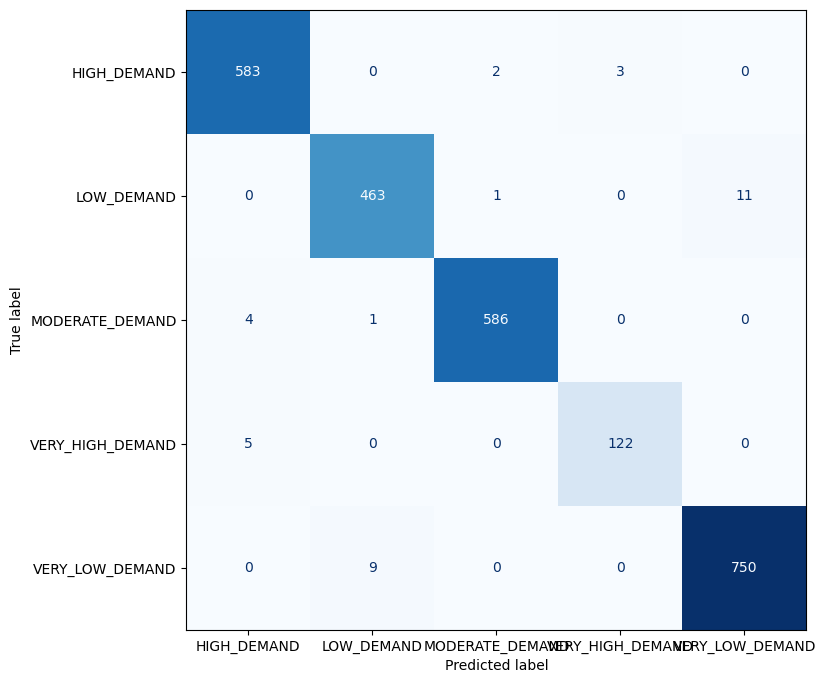

In [309]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = svc_linear.predict(X_test)
results.head()

# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 9))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=svc_linear.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)
plt.show()

### 3.1 Balancing data with SMOTE

In [310]:

smote = SMOTE(random_state=42)

In [311]:
del results
def evaluate_classifier_1(desc, df, clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    class_labels = ['VERY_LOW_DEMAND','LOW_DEMAND','MODERATE_DEMAND','HIGH_DEMAND','VERY_HIGH_DEMAND']
    model_matrix=confusion_matrix(y_test, clf.predict(X_test),labels=class_labels)
    profit_matrix=model_matrix*eval_matrix
    Total_annual_profit=np.sum(profit_matrix)
    df.loc[len(df.index)] = [desc,
                             accuracy_score(y_test, clf.predict(X_test)),
                             recall_score(y_test, clf.predict(X_test),average='weighted'),
                             precision_score(y_test, clf.predict(X_test),average='weighted'),
                             f1_score(y_test, clf.predict(X_test),average='weighted'),Total_annual_profit]

results = pd.DataFrame(columns=['Description', 'Accuracy', 'Recall', 'Precision', 'f1-score','Total_annual_profit'])

In [312]:
balancing_methods=[smote]
names=["SMOTE"]
for method, name in zip(balancing_methods, names):
    X_res, y_res = method.fit_resample(X_train, y_train)
    
    # SVC model with a linear kernel
    svc_linear = SVC(kernel='linear')# SVC_ model train
    svc_linear.fit(X_res, y_res)
    evaluate_classifier_1(f"SVC {name}", results, svc_linear, X_test, y_test)
    
    knn_clf=KNeighborsClassifier()
    knn_clf.fit(X_res,y_res)
    evaluate_classifier_1(f"KNN {name}", results, knn_clf, X_test, y_test)
    
    # random forest model creation
    Randomforest = RandomForestClassifier()
    Randomforest.fit(X_res,y_res)
    evaluate_classifier_1(f"RandomForestClassifier {name}", results, Randomforest, X_test, y_test)
    
    dtree=DecisionTreeClassifier(random_state=1)
    dtree_fit= dtree.fit(X_res, y_res)
    evaluate_classifier_1(f"Dtree {name}", results, dtree, X_test, y_test)
    
    ANN=MLPClassifier(hidden_layer_sizes=(500,200,100,10), max_iter=1000)
    ANN.fit(X_res, y_res)
    evaluate_classifier_1(f"ANN {name}", results, ANN, X_test, y_test)
    
    
    aboost = AdaBoostClassifier()
    aboost.fit(X_res, y_res)
    evaluate_classifier_1(f"aboost {name}", results, aboost, X_test, y_test)
    
    
    gboost = GradientBoostingClassifier()
    gboost.fit(X_res, y_res)
    evaluate_classifier_1(f"gboost {name}", results, gboost, X_test, y_test)

In [313]:
results

,Description,Accuracy,Recall,Precision,f1-score,Total_annual_profit
0,SVC SMOTE,0.981890,0.981890,0.982509,0.982000,897416500.0
1,KNN SMOTE,0.753543,0.753543,0.769402,0.757721,708522500.0
2,RandomForestClassifier SMOTE,0.999213,0.999213,0.999213,0.999213,909982500.0
3,Dtree SMOTE,1.000000,1.000000,1.000000,1.000000,910561500.0
4,ANN SMOTE,0.959055,0.959055,0.960186,0.959291,871728000.0
5,aboost SMOTE,0.580315,0.580315,0.431116,0.470246,472969500.0
6,gboost SMOTE,1.000000,1.000000,1.000000,1.000000,910561500.0


From above table the maximum profit is achieved in Decision tree and Gradiant boost models.

# Conclusion

Here the problem statement is to predict he demand of bike count amog the five categories of target variable, for every cycle in use we earn a revenue of 1000 krw and operation cost 500 krw, total profit per bike per hour is 500 krw, For our model the loss due to False positives and false negatives are qual, so we considered F1 as best evaluation metrics, along wih that we also calculated the total annual profit per annnum and used it to evaluate a model.



For a best model where it predicts the all TP accuately it gives the maximum profit and it is considerd as nest model, here in the results table we can see that Decision tree with SMOTE and Gradient boost models with SMOTE pedict the classes accuratly with F1 score.


Here we also observe that using balancing methods like SMOTE we increased the F1 score and profit of Support vector classifier increased a bit 892265000.0 to 895936500.0.

So we can consider decision tree and gradient boost models can be considerd as a best models and can be implemented for predicting the category of bike count. It may likely to overfit the model and may have high variance. so we need a proper monitoring on performce of model on future data.

Best use of model:

1. Here The data set consist of only the weather data ( weather risk) ,we can add some other features like, geographical details, demographic features to predict bike count demand.

2. For evaluation we considered the price and cost as per 2018 stats data, it should be revised as per the latest price details  for max performance of a model.

3. We cannot use this model for different locations( in different cities)  in some cities there may be swift change in weather forecast, so additional features are required for demand forecast. 
